# Алгоритам к-најближих суседа

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Petlja/specit4_ai_radni/blob/main/07-aлгоритам_к_најближих_суседа.ipynb)

Ова свеска прати лекцију о алгоритму к-најближих суседа.

Изврши доњу ћелију и учитај библиотеке које ће нам бити потребне у даљем раду.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Прво ћемо обрадити податке. Променљива `instance` прдставља све инстанце у скупу података. У првом реду су наведене плаве инстанце, а у другим црвене.  Наведена је посебно и зелена инстанца коју треба класификовати.

In [ ]:
instance = [
        (-0.25, 0, 1), (-2.5, 2, 1), (-1.5, 1.5, 1), (-2.5, 0.5, 1), (-2.5, 2, 1), (-2.5, 4, 1), (0.5, 3, 1), # plave
        (-1.5, 3.5, 0), (1, 3.5, 0), (3, 3, 0), (0.5, 0.25, 0), (0.75, -0.5, 0) #crvene
  ]

zelena_instanca = (0, 0)

Следећа функција ће нам помоћи да прикажемо суседство зелене инстанце одређено избором броја `k`.

In [ ]:
def prikazi_susedstvo(k, instance=instance, zelena_instanca=zelena_instanca):

  # podesavamo panel za iscrtavanje
  fig, ax = plt.subplots()
  ax.set_aspect(1)
  ax.set_axis_off()
  fig.set_size_inches(5, 5)

  # prikazujemo instance
  for instanca in instance:
    # za svaku instancu odredjujemo boju i oblik
    boja = 'red' if instanca[2] == 0 else 'blue'
    oblik = '^' if instanca[2] == 0 else 's'
    ax.scatter(instanca[0], instanca[1], color=boja, marker=oblik)

  # prikazujemo i zelenu instancu
  ax.scatter(zelena_instanca[0], zelena_instanca[1], color='green')

  # izracunavamo rastojanje od zelene instance do svih instanci u skupu
  rastojanja = np.array([np.sqrt(instanca[0]**2 + instanca[1]**2) for instanca in instance])

  # zatim odredjujemo koje je to rastojanje k-to po redu
  k_rastojanje = np.sort(rastojanja)[k-1]

  # i iscrtavamo krug oko zelene instance koji ima poluprecnik koji odgovara uocenom rastojanju
  r = k_rastojanje + 0.05
  circle = plt.Circle((zelena_instanca[0], zelena_instanca[1]), r, color='gray', linestyle='--', fill=False)
  ax.add_patch(circle)

  # konacno prikazujemo susedstvo
  plt.show()

Сада можеш да одабереш вредност броја к померањем слајдера, а потом и исцрташ суседство и одлучиш о томе којој класи припада зелена инстанца. Да би исцртао суседство мораш да извршиш ћелију.

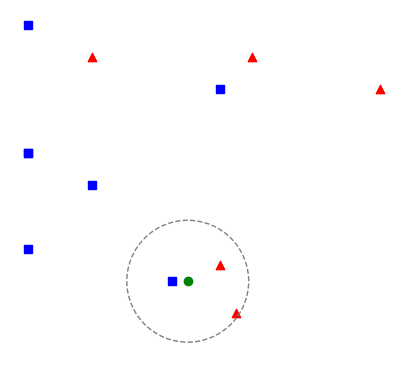

In [ ]:
k = 3 # @param {type:"slider", min:1, max:12, step:1}
prikazi_susedstvo(k)

Следећа ћелија садржи функцију која класификује нову инстанцу на основу задатих инстанци користећи алгоритма к-најближих суседа. Након што размисилиш којој класи припада инстанца, можеш да провериш свој закључак извршавањем ове фунцкије.

In [ ]:
def euklidsko_rastojanje(instanca1, instanca2):
  return np.sqrt((instanca1[0]-instanca2[0])**2 + (instanca1[1]-instanca2[1])**2)

In [ ]:
def kNN(k, instance, nova_instanca, klase={0:'crvena', 1: 'plava'}):

  # prvo izracunavamo rastojanja izmedju nove instance i svih instanci u skupu podataka
  rastojanja = [euklidsko_rastojanje(instanca, nova_instanca) for instanca in instance]

  # potom sortiramo rastojanja, izdvajamo k najmanjih i instance kojima odgovaraju
  # proglasavamo susedima
  susedi = np.argsort(rastojanja)[0:k]

  # zatim ocitavamo obelezja suseda i prebrojavamo ih
  obelezja_suseda = [instance[sused][2] for sused in susedi]
  prebrojavanja_obelezja = np.bincount(obelezja_suseda)

  # obelezje nove instance ce biti obelezje najbrojnijeg suseda
  klasa = np.argmax(prebrojavanja_obelezja)

  return klase[klasa]

In [ ]:
kNN(3, instance, zelena_instanca)

'crvena'